# Importing Dependencies and Set up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import random
import seaborn as sns

In [2]:
euro = "data/Euro_6_CLEAN.csv"
euro_df = pd.read_csv(euro, encoding='ANSI')
euro_df.head()

,Manufacturer,Model,Description,Transmission,Manual or Automatic,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Engine Power (Kw),...,Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Noise Level dB(A),Date of change,Cleaned CO2
0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,829.0,39.0,20.0,59.0,NaN,NaN,NaN,74.0,09-Feb-22,161.0
1,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,829.0,39.0,20.0,59.0,NaN,NaN,NaN,74.0,09-Feb-22,153.0
2,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,05-Oct-20,169.0
3,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,05-Oct-20,162.0
4,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,02-Jul-21,169.0


In [3]:
# show all columns
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", None)


## Testing Average Emissions by Fuel type 

In [6]:
emission_fueltype = euro_df.loc[:, ['Fuel Type','Cleaned CO2', 'THC + NOx Emissions [mg/km]', 'Date of change']]
emission_fueltype["Date of change"] = pd.to_datetime(emission_fueltype["Date of change"]).dt.strftime('%Y')
emission_fueltype.head()
#emission_date.dtypes

,Fuel Type,Cleaned CO2,THC + NOx Emissions [mg/km],Date of change
0,Petrol,161.0,59.0,2022
1,Petrol,153.0,59.0,2022
2,Petrol,169.0,79.0,2020
3,Petrol,162.0,79.0,2020
4,Petrol,169.0,79.0,2021


In [8]:
emission_fuelrename = emission_fueltype.rename(columns={"Cleaned CO2": "CO2 Emissions [mg/km]", "Date of change": "Year"})
emission_fuelrename.head()

,Fuel Type,CO2 Emissions [mg/km],THC + NOx Emissions [mg/km],Year
0,Petrol,161.0,59.0,2022
1,Petrol,153.0,59.0,2022
2,Petrol,169.0,79.0,2020
3,Petrol,162.0,79.0,2020
4,Petrol,169.0,79.0,2021


In [11]:
emission_fuel_groupby = emission_fuelrename.groupby(['Year', 'Fuel Type'], as_index=False)
emission_summary_fuel = emission_fuel_groupby.mean()
emission_summary_fuel.head()

,Year,Fuel Type,CO2 Emissions [mg/km],THC + NOx Emissions [mg/km]
0,2019,Diesel,154.400000,80.825000
1,2019,Petrol,158.827160,42.604938
2,2019,Petrol Electric,116.333333,26.000000
3,2020,Diesel,180.593137,55.869281
4,2020,Diesel Electric,114.868852,67.147541


C:\Users\chisi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

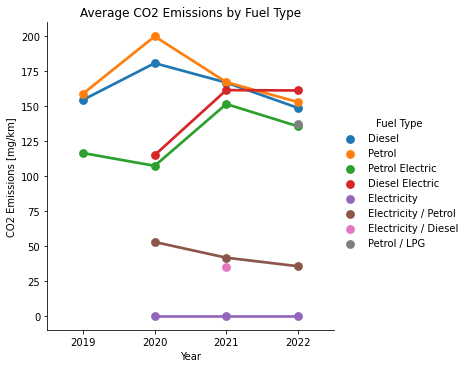

In [18]:
#ploting a line graph of Average CO2 Emissions by Powertrain 
plt.figure(figsize=(10,10))
sns.factorplot(data=emission_summary_fuel, x="Year", y="CO2 Emissions [mg/km]", hue="Fuel Type")
plt.title('Average CO2 Emissions by Fuel Type')
plt.show()

C:\Users\chisi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

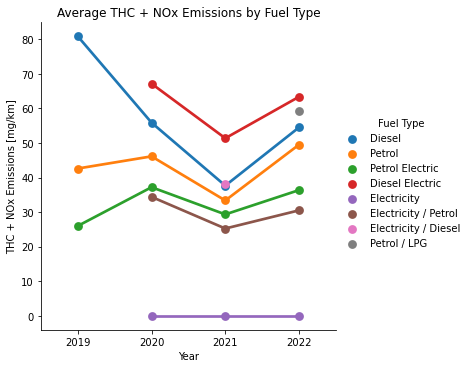

In [14]:
#ploting a line graph of Average THC + NOx Emissions by Powertrain 
plt.figure(figsize=(10,10))
sns.factorplot(data=emission_summary_fuel, x="Year", y="THC + NOx Emissions [mg/km]", hue="Fuel Type")
plt.title('Average THC + NOx Emissions by Fuel Type')
plt.show()